In [1]:
!pip install sklearn
!pip install matplotlib
!pip install NumPy

You should consider upgrading via the '/home/pedro/meu_projeto/meu_projeto_env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/pedro/meu_projeto/meu_projeto_env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/pedro/meu_projeto/meu_projeto_env/bin/python -m pip install --upgrade pip' command.


In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#Traz-se o dataset load_boston
from sklearn.datasets import load_boston

#Passa os valores doa função load_bosto para boston_data
boston_data = load_boston()

boston_data.keys()

print("a quantidade de linhas e colunas do dataset  são", boston_data.data.shape)
print(" o nome das características são", boston_data.feature_names)

#Converte do dicionário para Dataframe utilizando a biblioteca pandas.
#O data frame é um coleção de vetores que pode ser tratada
#como uma colina de duas dimensções. 
#Segundo autor pode-se ver pelo dataframe commo
# Linhas = observações
# Colunas = Atributos da observação
boston_df =pd.DataFrame(boston_data.data)

#coloca-se aqui o nome das colunas com esta função
boston_df.columns = boston_data.feature_names
boston_df.head()


a quantidade de linhas e colunas do dataset  são (506, 13)
 o nome das características são ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
#Quando utilizamos da regressão linear é necessário termos uma variável com as caracteristicas
#E a outra com o target para fazer as prediçoes. Sendo assim faz-se a separação.

#colocando no data frame a coluna Target que seria o "PRICE"
boston_df['PRICE'] = boston_data.target

#Cria-se a variável X com todos os valores do boston_df menos a coluna do 'PRICE'
X = boston_df.drop('PRICE', axis=1)

lm = LinearRegression()
#lm.fit funciona com (training data, valor esperado)

lm.fit(X, boston_df.PRICE)

#Intercept_ e coef_ são retorno da função sendo que:
#intercept_ => Termos independetes da função
#coef_ => Coeficientes da regrasão linear

print("Intercept: ", lm.intercept_)
print("Coeficiente: ", lm.coef_)

#Como não fica clara a visualização é feito uma ligação do coeficiente ser ligado a qual preditor desta forma:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features','CoeficienteEstimado'])




Intercept:  36.45948838508978
Coeficiente:  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


,features,CoeficienteEstimado
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [40]:
#Faz-se o erro quadrático médio
#faz-se apenas os primeiros 5 números
lm.predict(X)[0:5]
mseFull = np.mean((boston_df.PRICE - lm.predict(X)) ** 2)
print(mseFull)

21.894831181729202


In [41]:
#Treinamento e teste do modelo

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,boston_df.PRICE, test_size=0.3)
print(X_train)

         CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
225   0.52693   0.0   6.20   0.0  0.5040  8.725   83.0  2.8944   8.0  307.0   
108   0.12802   0.0   8.56   0.0  0.5200  6.474   97.1  2.4329   5.0  384.0   
109   0.26363   0.0   8.56   0.0  0.5200  6.229   91.2  2.5451   5.0  384.0   
405  67.92080   0.0  18.10   0.0  0.6930  5.683  100.0  1.4254  24.0  666.0   
478  10.23300   0.0  18.10   0.0  0.6140  6.185   96.7  2.1705  24.0  666.0   
..        ...   ...    ...   ...     ...    ...    ...     ...   ...    ...   
280   0.03578  20.0   3.33   0.0  0.4429  7.820   64.5  4.6947   5.0  216.0   
348   0.01501  80.0   2.01   0.0  0.4350  6.635   29.7  8.3440   4.0  280.0   
210   0.17446   0.0  10.59   1.0  0.4890  5.960   92.1  3.8771   4.0  277.0   
14    0.63796   0.0   8.14   0.0  0.5380  6.096   84.5  4.4619   4.0  307.0   
332   0.03466  35.0   6.06   0.0  0.4379  6.031   23.3  6.6407   1.0  304.0   

     PTRATIO       B  LSTAT  
225     17.4  382.00 

In [42]:
#Faz-se os mesmos passos anteriores, porém agora estamos utilizando os dados de teste
lm_tts = LinearRegression()
lm_tts.fit(X_train, y_train)
print("Intercept: ", lm_tts.intercept_)
print("Coeficiente: ", lm_tts.coef_)
pd.DataFrame(list(zip(X_train.columns,lm_tts.coef_)), columns=['features','CoeficienteEstimado'])

Intercept:  43.205606928146594
Coeficiente:  [-1.16543175e-01  5.70027682e-02  4.38031393e-02  2.57182874e+00
 -1.65657665e+01  3.23565081e+00 -8.39403622e-03 -1.66749083e+00
  3.62244324e-01 -1.50336685e-02 -1.02663507e+00  8.52733124e-03
 -5.69138221e-01]


,features,CoeficienteEstimado
0,CRIM,-0.116543
1,ZN,0.057003
2,INDUS,0.043803
3,CHAS,2.571829
4,NOX,-16.565767
5,RM,3.235651
6,AGE,-0.008394
7,DIS,-1.667491
8,RAD,0.362244
9,TAX,-0.015034


In [43]:
#Com os valores do teste e da predição caluclados, podemos fazer o erro
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
print("MSE for Y_train", np.mean((y_train - lm.predict(X_train)) ** 2 ))
print("MSE for Y_test", np.mean((y_test - lm.predict(X_test)) ** 2 ))

MSE for Y_train 25.36927528327627
MSE for Y_test 13.803033734705112


Text(0, 0.5, 'residuals')

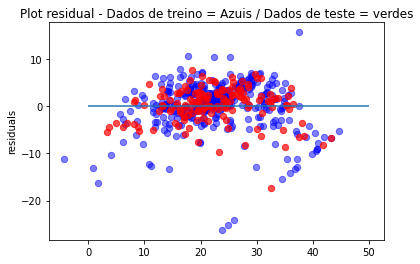

In [44]:
plt.scatter(pred_train,pred_train - y_train, c = 'b', s=40, alpha=0.5)
plt.scatter(pred_test,pred_test - y_test, c = 'r', s=40, alpha=0.7)
plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Plot residual - Dados de treino = Azuis / Dados de teste = verdes')
plt.ylabel('residuals')
#pagina 74

#Questão de modelos de regressão

In [45]:
from sklearn.model_selection import train_test_split
hr_data=pd.read_csv('datahr.csv', header=0)
hr_data.head()
#Temos várias categorias discretas que vamos passar para números. 
#Existemm 2 tipos de categorias, as ordinárias, que são aquelas que se tem uma ordem nos valores como high medium e low
#E temos aquelas que não possui uma ordem como as cores que podem ser vermelhas, azuis ou amarelas. Neste caso
#Elas são colocadas como nominais
#Uma função que é utilizada para isto é o dummy enconding a qual iremos utilizar

data_trnsf = pd.get_dummies(hr_data, columns=['RecruitmentSource', 'PerformanceScore'])

X =data_trnsf.drop('RecruitmentSource_Indeed',axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, data_trnsf.RecruitmentSource_Indeed, test_size=0.3)

attrition_classifier = LogisticRegression()
attrition_classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'Sparks, Taylor  '